In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 6                #number of agents
N_buckets = 60              #number of buckets
max_turns = 10*N_agents     #max number of moves in single game...each agent moves 10 times per game
weather = True              #set=True to turn on weather effects
rn_seed = 15                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment

environment =  {'max_turns': 60, 'rn_seed': 15, 'N_agents': 6, 'bucket_params': {'p0': array([ 0.        ,  0.00033898,  0.00067797,  0.00101695,  0.00135593,
        0.00169492,  0.0020339 ,  0.00237288,  0.00271186,  0.00305085,
        0.00338983,  0.00372881,  0.0040678 ,  0.00440678,  0.00474576,
        0.00508475,  0.00542373,  0.00576271,  0.00610169,  0.00644068,
        0.00677966,  0.00711864,  0.00745763,  0.00779661,  0.00813559,
        0.00847458,  0.00881356,  0.00915254,  0.00949153,  0.00983051,
        0.01016949,  0.01050847,  0.01084746,  0.01118644,  0.01152542,
        0.01186441,  0.01220339,  0.01254237,  0.01288136,  0.01322034,
        0.01355932,  0.01389831,  0.01423729,  0.01457627,  0.01491525,
        0.01525424,  0.01559322,  0.0159322 ,  0.01627119,  0.01661017,
        0.01694915,  0.01728814,  0.01762712,  0.0179661 ,  0.01830508,
        0.01864407,  0.01898305,  0.01932203,  0.01966102,  0.02      ]), 'sigma': array([ 0.        ,  0.00038983,  0.00

In [6]:
#initialize state
state = initialize_state(environment)
print 'state = ', state

state =  {'previous_weather': 'nominal', 'agent_locations': array([33, 15, 42, 36, 50, 49]), 'bucket_productivity': array([  0.00000000e+00,   5.06315889e-04,  -4.52649044e-05,
         3.89949362e-04,   2.74258749e-03,   2.20277026e-03,
        -1.15464668e-03,   1.94869705e-03,   6.58070804e-03,
         3.89416848e-03,  -1.04756730e-03,   4.47111657e-03,
         3.91876057e-03,  -3.26442859e-03,   4.72856244e-03,
         8.17698107e-03,   2.84686381e-03,   9.90569554e-03,
         1.18147360e-02,   5.87658119e-03,   2.11071440e-02,
        -1.78565125e-03,   2.71157942e-03,   1.38901101e-02,
        -8.01961635e-03,   7.49492914e-03,   3.59156445e-02,
         1.91564013e-02,   1.56726838e-02,   8.19750522e-03,
        -1.60347937e-03,   9.80903945e-03,   1.78970728e-02,
         1.88180268e-02,   1.41785292e-02,   2.26147315e-02,
         8.12120657e-03,  -6.21566460e-03,   1.47553047e-02,
        -1.97031914e-03,   2.01850951e-02,   3.32509502e-02,
         6.63525768e-03,   5.5

In [7]:
#show that weather can change as agents move
state = initialize_state(environment)
agent = 0
action = 0
while (True):
    state = update_agents(state, agent, action, environment)
    if (state['weather'] != 'nominal'): break
    agent +=1
    if (agent >= N_agents): agent = 0
print 'state = ', state
state = update_agents(state, agent, action, environment)
print 'state = ', state
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector

state =  {'previous_weather': 'nominal', 'agent_locations': array([0, 0, 0, 0, 0, 0]), 'bucket_productivity': array([  0.00000000e+00,   4.11712729e-04,  -2.14916887e-04,
         1.72591774e-03,   2.13140580e-03,   3.88106638e-03,
         1.69257827e-03,   1.46237147e-03,   5.17922826e-04,
        -9.48606386e-04,   3.08620518e-03,  -4.97380537e-04,
         8.40229265e-03,   7.02050230e-04,   4.87909165e-03,
        -4.82922415e-03,   4.27286041e-03,   8.30133722e-03,
        -3.77677085e-03,   1.13481303e-02,   9.00773287e-03,
         7.15866201e-03,   4.48490975e-03,   2.54768146e-03,
         2.26776197e-02,  -1.05617671e-02,   1.12249078e-02,
        -4.68051296e-03,   2.43492297e-02,   2.91228880e-03,
        -1.47516463e-03,   2.93205955e-02,   2.72068947e-02,
         1.22387492e-02,  -1.77713712e-03,   1.95511419e-02,
         3.03475354e-02,  -2.17851098e-03,  -8.64484732e-03,
         2.24579181e-02,   2.73670911e-02,   1.25928545e-02,
         1.34342725e-02,   3.5478129

In [8]:
#move an agent
agent = 1
action = 2
state_next = update_agents(state, agent, action, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state_next =  {'previous_weather': 'stormy', 'agent_locations': array([0, 2, 0, 0, 0, 0]), 'bucket_productivity': array([ 0.        ,  0.00059051, -0.00016729,  0.0002345 ,  0.002678  ,
        0.00208991,  0.00503795, -0.00062548,  0.00339478,  0.00353561,
        0.00050593, -0.00027546,  0.01304431,  0.01195497,  0.01315782,
       -0.0017304 ,  0.01090412,  0.00800251,  0.01444804, -0.00632324,
       -0.00131751, -0.00785426, -0.01728707, -0.00252601, -0.01819954,
       -0.0066821 , -0.02617908, -0.02325911, -0.00357977, -0.02795111,
       -0.00826039, -0.00235734, -0.00158842, -0.00852561, -0.00038072,
       -0.02170462, -0.03542389, -0.03261646, -0.00678159, -0.02491343,
       -0.02759279, -0.00287686, -0.01706449, -0.01302284, -0.04297255,
       -0.02414729, -0.01729053, -0.02488844, -0.01647397, -0.01008146,
       -0.00799023, -0.01727263, -0.00200318, -0.00185727, -0.01688768,
       -0.00663226, -0.00620769, -0.04010653, -0.01430229, -0.02534551]), 'weather': 'stormy',

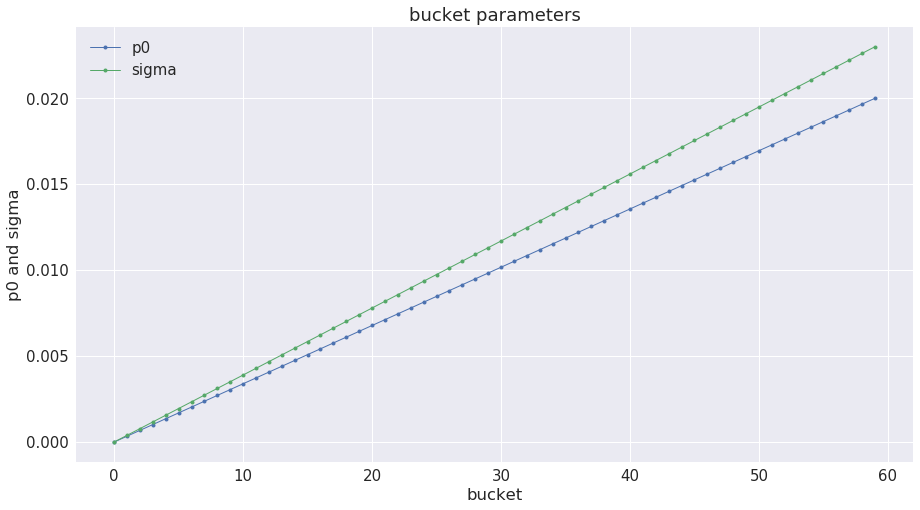

In [9]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='sigma')
p = ax.legend()

In [10]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  61


,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,stormy,27,6.086441,1.001130,1.007428,1.023785,1.001130,1.056296,0.996671
1,1,stormy,20,6.140949,1.008824,1.003555,1.056825,1.008824,1.070741,0.992180
2,2,stormy,48,6.057799,0.996707,0.989320,1.033534,0.996707,1.052036,0.989494
3,3,stormy,11,5.984378,0.982415,0.973166,1.025218,1.004304,1.023082,0.976193
4,4,stormy,48,6.005185,0.985611,0.970690,1.032167,1.011456,1.030017,0.975245


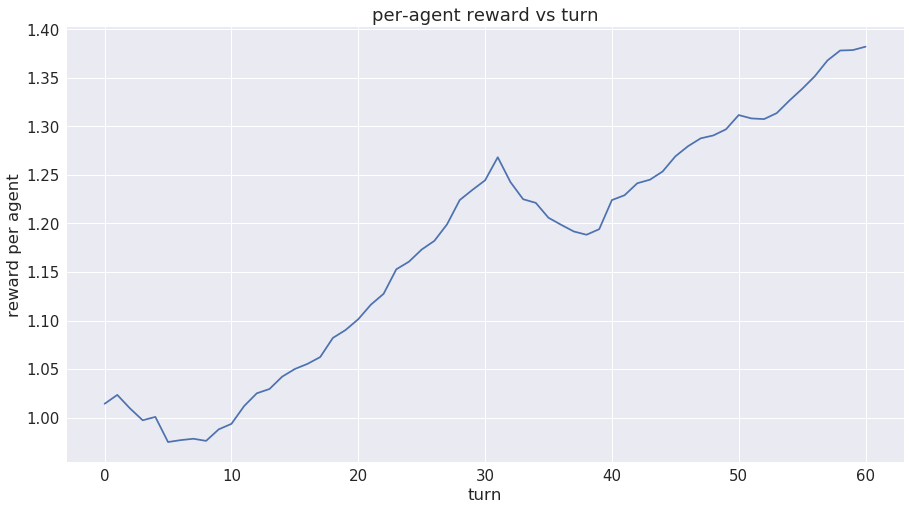

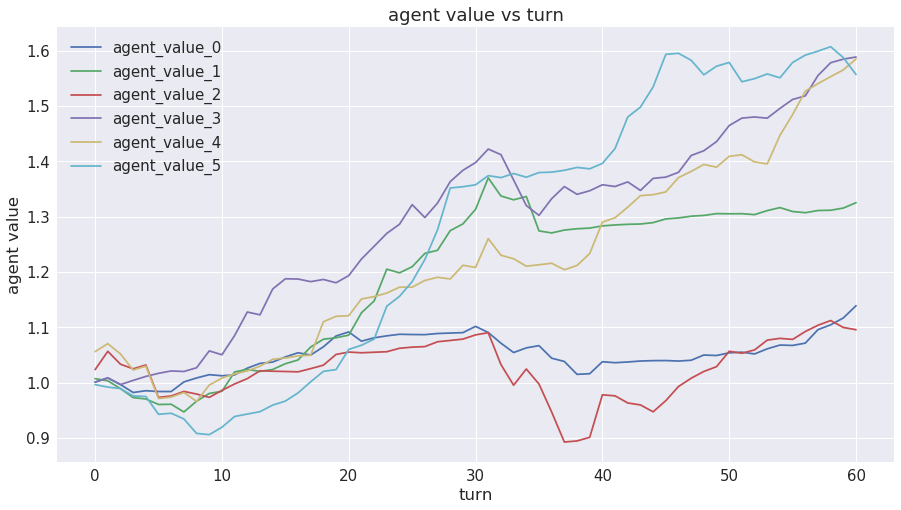

In [11]:
#plot per-agent reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

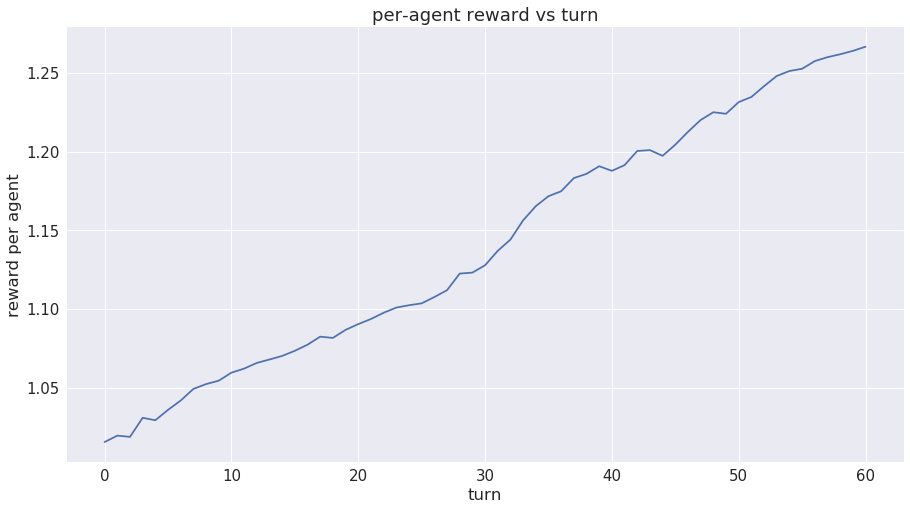

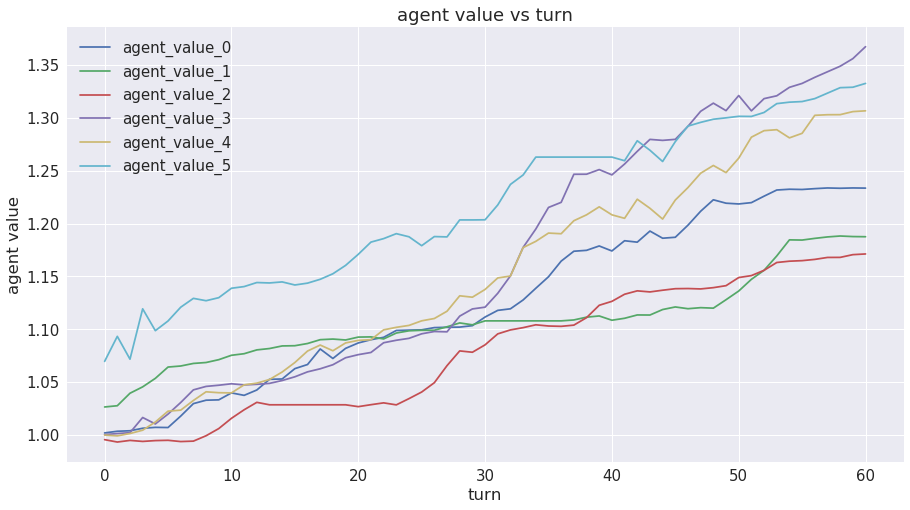

In [12]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

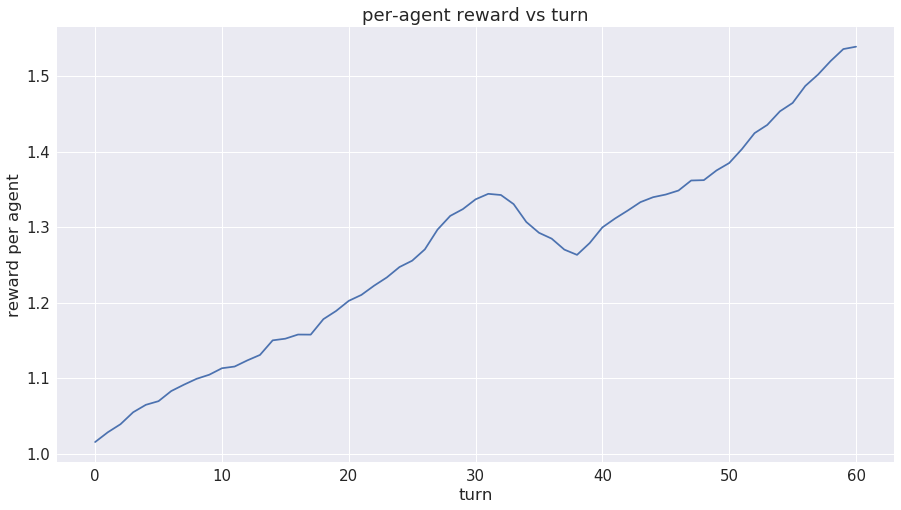

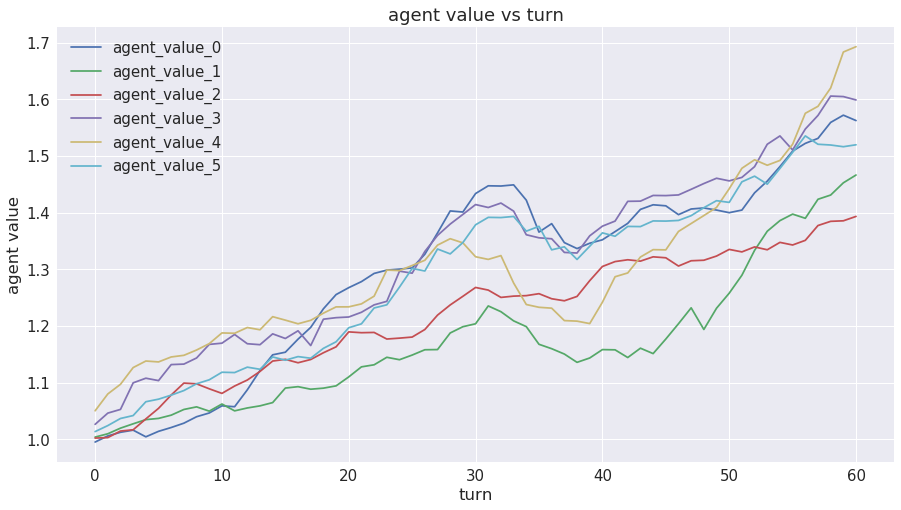

In [13]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

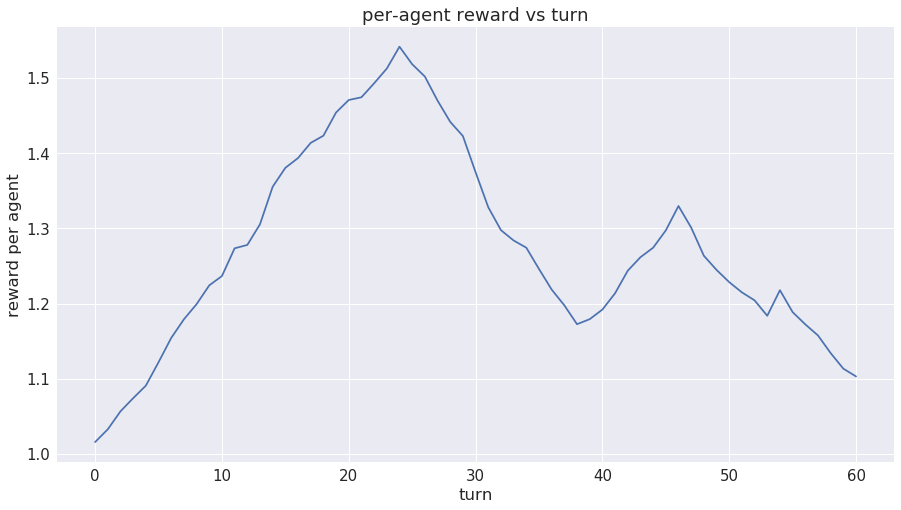

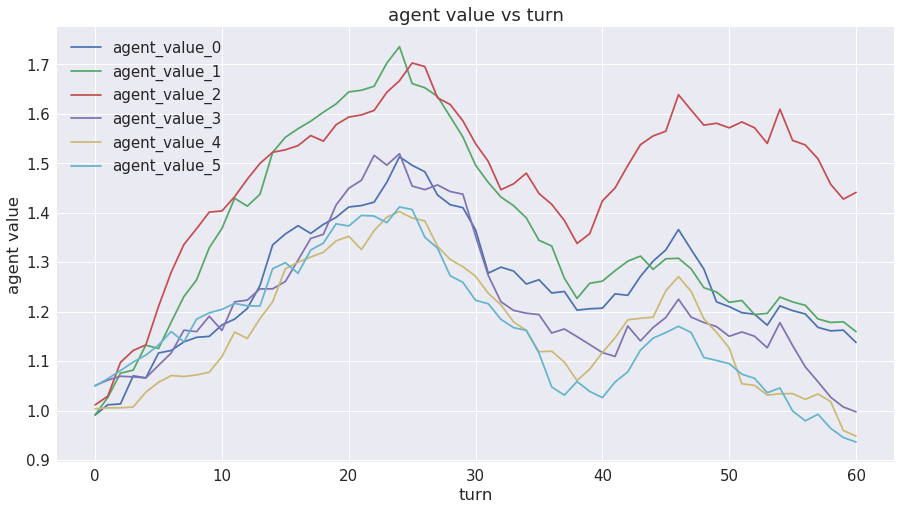

In [14]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [15]:
#play 30 games using various strategies, and generate stats for each strategy
N_games = 30
strategies = ['low', 'middle', 'high']#, 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  high


mean       std
strategy turn                    
middle   56    9.387736  0.270844
         57    9.431477  0.274310
         58    9.493054  0.275582
         59    9.543892  0.280382
         60    9.611208  0.281021

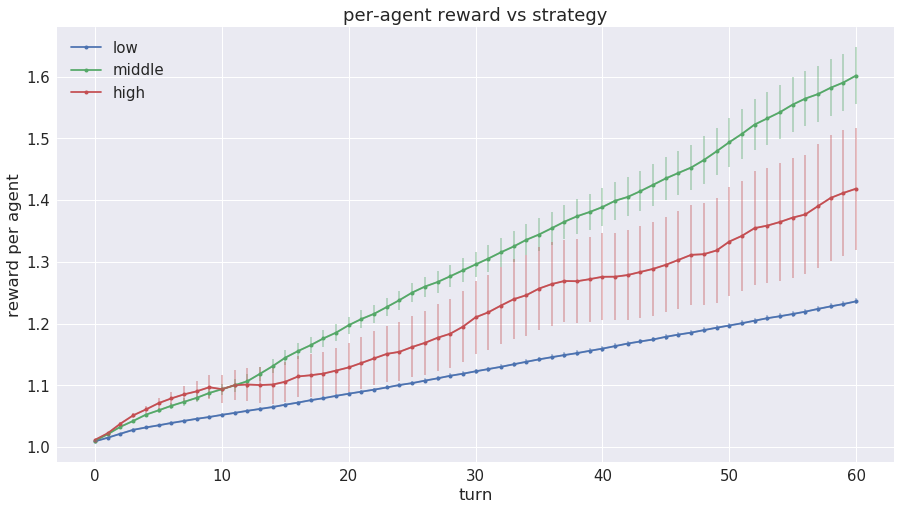

In [16]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [17]:
#play 500 random games and store moves in memories queue
N_games = 500                  #set=N_training_games
strategy = 'random'
memories_list = []
N_memories = 0
for N_game in range(N_games):
    memories = play_game(environment, strategy)
    memories_list += [memories]
    N_memories += len(memories)
memories = deque(maxlen=N_memories)
for game_memories in memories_list:
    for m in game_memories:
        memories.append(m)
print 'number of memories = ', len(memories)

number of memories =  30500


In [18]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = 10*N_buckets
model = mlp_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  6
N_buckets =  60
N_inputs =  129
N_neurons =  600
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               78000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 600)               360600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                36060     
Total params: 474,660
Trainable params: 474,660
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#train model
N_training_games = 500                 #number of games played during training
N_validation_games = 1                   #number of smart games played after each training game
gamma = 0.5                               #discount for future rewards
batch_size = 10                            #number of memories used during experience-replay
debug = False                              #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, games, epsilons, mean_validation_reward = \
    train(environment, model, N_training_games, N_validation_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  10
training model


/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... 
training done


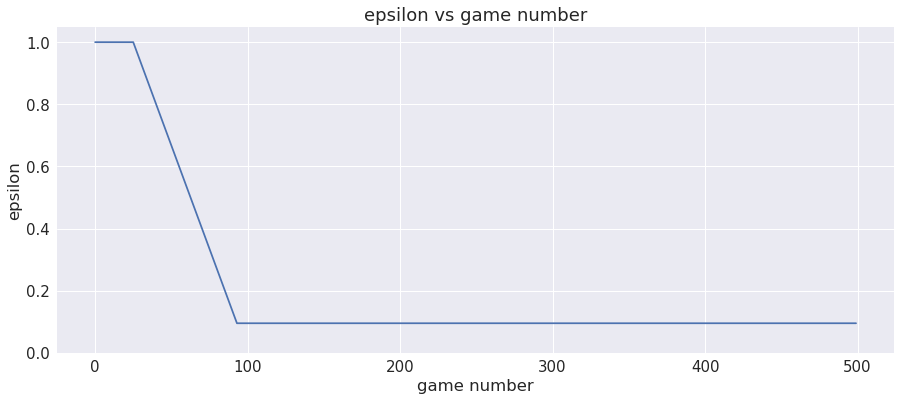

In [20]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')
p = ax.set_ylim(0.0, 1.05)

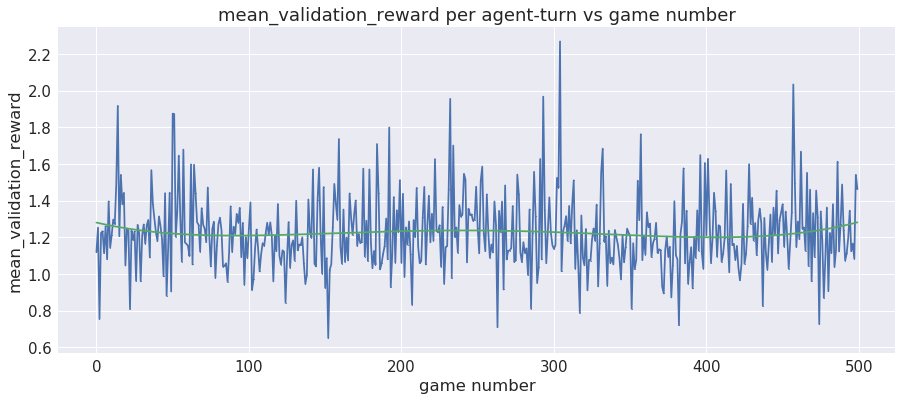

In [21]:
#plot median_validation_rewards vs validation game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = mean_validation_reward/N_agents/max_turns
p = ax.plot(xp, yp, marker='o', linestyle='-', markersize=1)
p = ax.set_title('mean_validation_reward per agent-turn vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('mean_validation_reward')
import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(xp, yp, 4)
yp_fit = poly.polyval(xp, coefs)
p = ax.plot(xp, yp_fit)

In [60]:
#play smart game using trained model to select best action
strategy = 'smart'
memories = play_game(environment, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
reward_history.head(20)

,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,nominal,34,6.042649,1.010471,1.024262,1.015452,0.986237,0.997629,1.008598
1,1,nominal,34,6.051321,1.007807,1.021563,0.992022,0.985134,1.000644,1.044151
2,2,nominal,34,6.146152,1.035000,1.049126,1.018789,0.978475,1.016292,1.048470
3,3,nominal,34,6.197699,1.046207,1.060487,1.029821,0.989070,1.025648,1.046466
4,4,nominal,34,6.391335,1.071519,1.086144,1.054736,1.013000,1.050462,1.115474
5,5,nominal,34,6.391371,1.071525,1.086150,1.054742,1.013006,1.050468,1.115481
6,6,nominal,34,6.507655,1.091020,1.105911,1.073932,1.031436,1.069580,1.135775
7,7,nominal,34,6.646279,1.114261,1.129469,1.096809,1.053407,1.092364,1.159969
8,8,nominal,34,6.699956,1.123260,1.138591,1.105667,1.061915,1.101186,1.169338
9,9,nominal,34,6.674196,1.118941,1.134213,1.101415,1.057832,1.096952,1.164842


nominal 41
stormy 7
hot 13


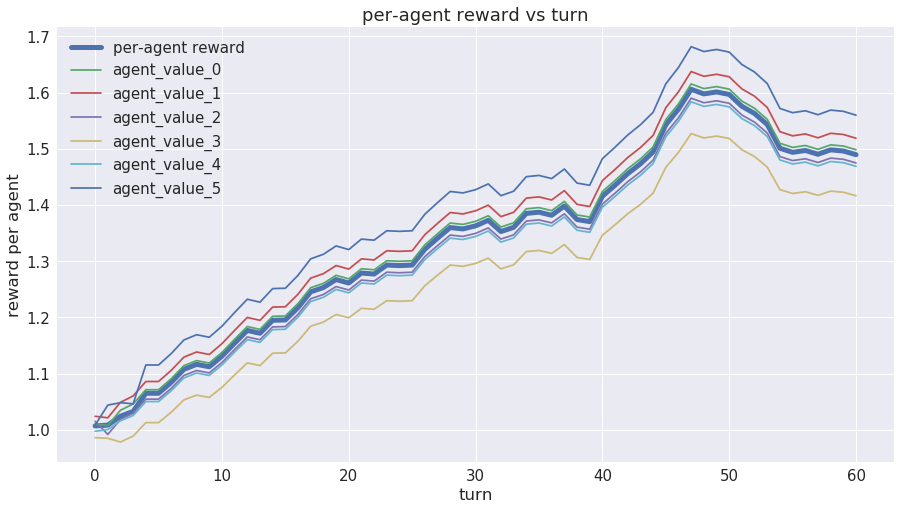

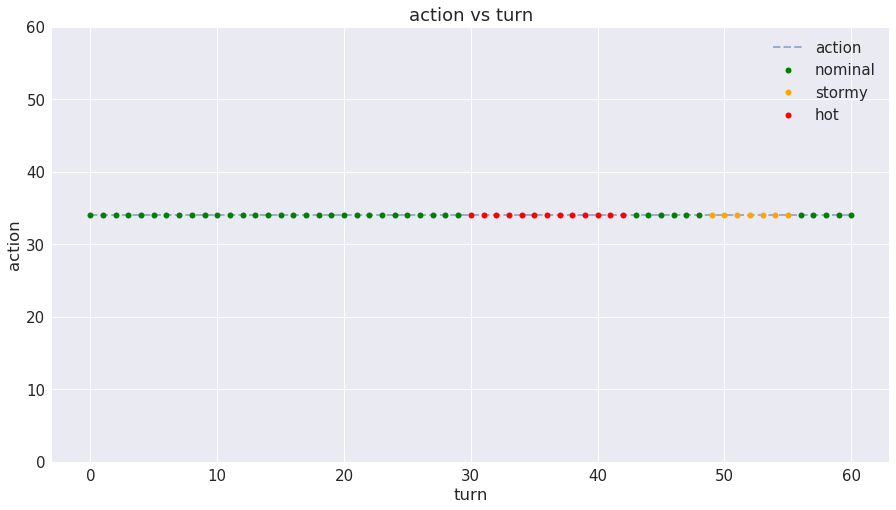

In [61]:
#plot agents value versus turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()
#plot action vs turn
xp = df['turn']
yp = df['action']
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('action vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('action')
p = ax.set_ylim(0, N_buckets)
p = ax.plot(xp, yp, linewidth=2, linestyle='--', alpha=0.5, label='action')
colors = ['green', 'orange', 'red']
weathers = ['nominal', 'stormy', 'hot']
for idx in range(len(weathers)):
    weather = weathers[idx]
    color = colors[idx]
    jdx = (df['weather'] == weather)
    xp = df[jdx]['turn']
    yp = df[jdx]['action']
    p = ax.plot(xp, yp, marker='o', markersize=6, color=color, linestyle='none', label=weather)
    print weather, jdx.sum()
p = ax.legend()
#yp.values[-10:]

strategy =  low
strategy =  middle
strategy =  high
strategy =  smart
strategy =  best


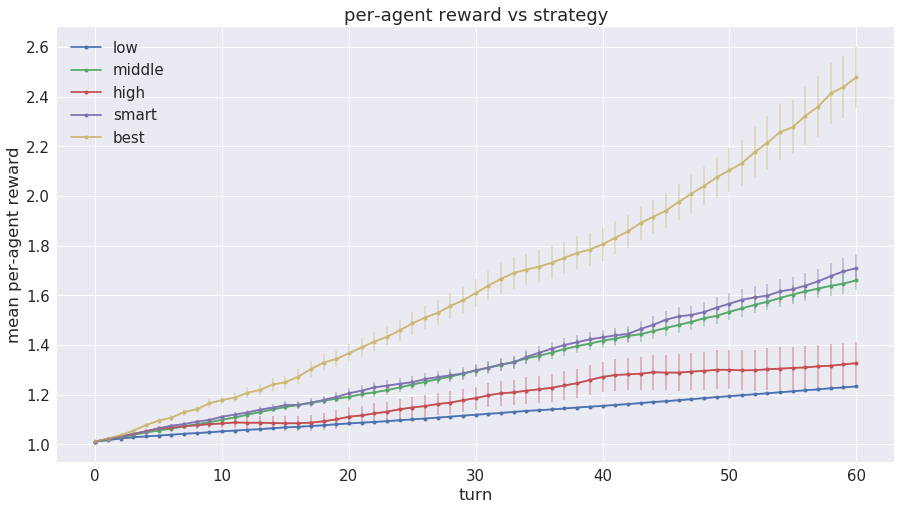

In [24]:
#play 30 games using various strategies and plot outcomes
N_games = 30
strategies = ['low', 'middle', 'high', 'smart', 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy, model=model)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [25]:
#done! 6min on aws 4 min on laptop
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  10.8341783007
